<a href="https://colab.research.google.com/github/kundajelab/feature_interactions/blob/master/zeropadding/EvaluateModelsGivenPredictionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [1]:
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/train_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/train_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_orig_neg.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_orig_pos.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_pos_interactions.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_neg_maineff.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/shuff_toanalyze_orig_oraclepred_neg.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/shuff_toanalyze_orig_oraclepred_pos.txt.gz

--2020-06-26 02:48:36--  https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_neg_labels.txt.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kundajelab/feature_interactions/78d4a6bb7cc34b940fa2b68dba2c7fb91141a165/zeropadding/data/test_neg_labels.txt.gz [following]
--2020-06-26 02:48:36--  https://raw.githubusercontent.com/kundajelab/feature_interactions/78d4a6bb7cc34b940fa2b68dba2c7fb91141a165/zeropadding/data/test_neg_labels.txt.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 529495 (517K) [application/octet-stream]
Saving to: ‘test_neg_labels.txt.gz’

test_neg

In [2]:
!gunzip -f *.gz

In [3]:
!md5sum *

md5sum: drive: Is a directory
md5sum: model_preds: Is a directory
md5sum: sample_data: Is a directory
6093d9043a00d2bfa3fdc6859572e9b7  shuff_toanalyze_orig_oraclepred_neg.txt
d2e04fad6e6e98c3f9c3ef1fc08fe23b  shuff_toanalyze_orig_oraclepred_pos.txt
39fc6fc8d08dd8841426d1d2fe494012  test_neg_labels.txt
79d5b7333ba54c24589fcaacf89012f4  test_pos_labels.txt
85c3688d157254921f64904e71c0372c  test_simulation.simdata
002b916226815c1d826486666c2d2473  test_toanalyze_groundtruth_neg_maineff.txt
dbdbb4750187547a5fe035f3df27c87f  test_toanalyze_groundtruth_orig_neg.txt
14d291068b82b0c7db298b90e2155a3a  test_toanalyze_groundtruth_orig_pos.txt
adb5edc65ee6060f2770f19bf344a48c  test_toanalyze_groundtruth_pos_interactions.txt
28cc4a0c1e8884dbeab0c328b1a29f07  test_toanalyze_orig_neg_labels.txt
7d1ba501734d12678c78f53cc2ab7e54  test_toanalyze_orig_pos_labels.txt
md5sum: trained_models: Is a directory
8cd9559ad168d2e7f0a4d20e906e6e02  train_toanalyze_orig_neg_labels.txt
58f3dced1b6ae204e8450b68f6c9f1

In [5]:
from google.colab import drive
drive.mount('/content/drive')

!ln -s /content/drive/My\ Drive/colab_notebook_data/feature_interactions/model_preds_zeropadding/ model_preds
!ls model_preds

#!wget https://github.com/kundajelab/feature_interactions/raw/619bc75/av/model_preds.tgz
#!tar -xzf model_preds.tgz model_preds

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ln: failed to create symbolic link 'model_preds/model_preds_zeropadding': Operation not supported
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed100_bemnn.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed200_dmeaz.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed300_vwlzj.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed400_vyqvb.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed500_msloc.h5
negcontrol_model-anscombemse_arch1_l1reg-0.001_seed100_tiefn.h5
negcontrol_model-anscombemse_arch1_l1reg-0.001_seed200_iwhrl.h5
negcontrol_model-anscombemse_arch1_l1reg-0.001_seed300_trosb.h5
negcontrol_model-anscombemse_arch1_l1reg-0.001_seed400_lwxxh.h5
negcontrol_model-anscombemse_arch1_l1reg-0.001_seed500_hpjfm.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0_seed100_gbywe.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0_seed200_brovm.h5
negc

In [6]:
import numpy as np


#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels) 
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return


def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1


def anscombe_transform(vals):
  assert np.min(vals)>=(-3.0/8), np.min(vals)
  return 2*np.sqrt(vals + 3.0/8)


def inverse_anscombe_transform(vals):
  return np.square(vals/2.0) - 3.0/8


def load_onehot_sequences(filename):
  return np.array([one_hot_encode_along_channel_axis(x.rstrip())
                   for x in open(filename)])


def load_numerical(filename):
  return np.array([float(x.rstrip()) for x in open(filename)])


def read_labels_and_oracle(filename):
  labels = np.array([float(x.split("\t")[0]) for
                      x in open(filename)])
  oracle = np.array([float(x.split("\t")[1]) for
                      x in open(filename)])
  return labels, oracle


test_pos_labels, test_pos_oracle =\
  read_labels_and_oracle("test_pos_labels.txt")
test_neg_labels, test_neg_oracle =\
  read_labels_and_oracle("test_neg_labels.txt")

test_toanalyze_orig_neg_labels =\
  load_numerical("test_toanalyze_orig_neg_labels.txt")
test_toanalyze_orig_pos_labels =\
  load_numerical("test_toanalyze_orig_pos_labels.txt")

train_toanalyze_orig_neg_labels =\
  load_numerical("train_toanalyze_orig_neg_labels.txt")
train_toanalyze_orig_pos_labels =\
  load_numerical("train_toanalyze_orig_pos_labels.txt")

test_toanalyze_groundtruth_neg_maineff=\
  load_numerical("test_toanalyze_groundtruth_neg_maineff.txt")
test_toanalyze_groundtruth_pos_interactions=\
  load_numerical("test_toanalyze_groundtruth_pos_interactions.txt")

shuff_toanalyze_orig_oraclepred_neg =\
  load_numerical("shuff_toanalyze_orig_oraclepred_neg.txt")
shuff_toanalyze_orig_oraclepred_pos =\
  load_numerical("shuff_toanalyze_orig_oraclepred_pos.txt")

In [7]:
from collections import namedtuple
import scipy.stats
import h5py


def compute_loss(preds, labels):
  return np.square(anscombe_transform(preds)-anscombe_transform(labels))


#positive means interaction improved the loss
def compute_lossimprovement(orig_preds, maineff_preds, labels):
  assert np.min(orig_preds) > (-3.0/8), np.min(orig_preds)
  assert np.min(labels) > (-3.0/8), np.min(labels)
  #for the purpose of avoiding taking sqrt of negative number,
  # make sure maineff preds > (-3.0/8) - the reason we can get smaller
  # maineff preds than this is that we are computing main effects in counts
  # space, whereas model predictions are in anscombe transform space.
  if (np.min(maineff_preds) < -3.0/8):
    print("Warning: too-low maineff preds in % examples:",
          np.mean(maineff_preds < -3.0/8))
    maineff_preds = np.maximum(maineff_preds, -3.0/8)
  
  maineffpreds_loss = compute_loss(preds=maineff_preds, labels=labels)
  origpreds_loss = compute_loss(preds=orig_preds, labels=labels)

  return ((maineffpreds_loss - origpreds_loss),
          maineffpreds_loss, origpreds_loss)


InteractionEffectData = namedtuple("InteractionEffectData",
  ["orig_preds", "A_main_eff", "B_main_eff", "inter_eff", "maineff_preds"])


def get_interactioneffectdata(modelpredsfile, perturbedseqskey):
  model_h5 = h5py.File(modelpredsfile, "r")
  orig_preds = np.array(model_h5[perturbedseqskey]['orig_onehot_preds'])
  Aoff_preds = np.array(model_h5[perturbedseqskey]['Aoff_onehot_preds'])
  Boff_preds = np.array(model_h5[perturbedseqskey]['Boff_onehot_preds'])
  bothoff_preds = np.array(model_h5[perturbedseqskey]['bothoff_onehot_preds'])
  model_h5.close()

  A_main_eff = (Boff_preds - bothoff_preds)
  B_main_eff = (Aoff_preds - bothoff_preds)
  inter_eff = (orig_preds - bothoff_preds) - (A_main_eff + B_main_eff)
  maineff_preds = bothoff_preds + A_main_eff + B_main_eff

  return InteractionEffectData(orig_preds=orig_preds, A_main_eff=A_main_eff,
                               B_main_eff=B_main_eff, inter_eff=inter_eff,
                               maineff_preds=maineff_preds)


InteractionAnalysis = namedtuple("InteractionAnalysis",
  ["overall_test_loss",
   
   "test_toanalyze_interactioneffectdata",
   "test_toanalyze_lossimprovement",
   
   "controltest_toanalyze_lossimprovement",

   "shuff_toanalyze_interactioneffectdata",
   "shuff_toanalyze_lossimprovement",

   "train_toanalyze_interactioneffectdata",
   "train_toanalyze_lossimprovement",

   "controltrain_toanalyze_lossimprovement",
   
   "test_toanalyze_intereff_wilcoxon",
   "test_toanalyze_lossimprovement_wilcoxon",
   "test_toanalyze_lossimprovement_mannwhit",
   "test_v_controltest_lossimp_mannwhit",
   "test_v_controltest_intereff_mag_mannwhit",
   
   "train_toanalyze_lossimprovement_wilcoxon",
   "train_toanalyze_lossimprovement_mannwhit",
   "train_v_controltrain_lossimp_mannwhit",
   "train_v_test_lossimp_mannwhit",
   "train_v_controltrain_intereff_mag_mannwhit",

   "test_v_shuff_intereff_mag_mannwhit",
   "test_v_shuff_lossimp_mannwhit"
   ])


def perform_interaction_analysis(modelpredsfile,
                                 all_test_labels,
                                 test_toanalyze_labels,
                                 train_toanalyze_labels,
                                 shuff_toanalyze_oraclepreds):

  overall_test_loss = compute_loss(
      preds=np.array(h5py.File(modelpredsfile,"r")["all_test_preds"][:]),
      labels=all_test_labels)

  test_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='test_toanalyze_perturbedseqs')
  controltest_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='controltest_toanalyze_perturbedseqs')

  (test_toanalyze_lossimprovement, test_toanalyze_maineffpreds_loss,
   test_toanalyze_origpreds_loss)= compute_lossimprovement(
      orig_preds=test_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=test_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels)
  controltest_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=controltest_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=controltest_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels)
  
  train_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='train_toanalyze_perturbedseqs')
  controltrain_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='controltrain_toanalyze_perturbedseqs')
  
  (train_toanalyze_lossimprovement, train_toanalyze_maineffpreds_loss,
   train_toanalyze_origpreds_loss) = compute_lossimprovement(
      orig_preds=train_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=train_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels)
  controltrain_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=controltrain_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=controltrain_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels)
  
  shuff_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='shuff_toanalyze_perturbedseqs')
  shuff_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=shuff_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=shuff_toanalyze_interactioneffectdata.maineff_preds,
      labels=shuff_toanalyze_oraclepreds)
  
  test_toanalyze_intereff_wilcoxon = scipy.stats.wilcoxon(
      x=test_toanalyze_interactioneffectdata.inter_eff,
      alternative="two-sided")
  
  test_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=test_toanalyze_lossimprovement,
    alternative="greater")
  test_toanalyze_lossimprovement_mannwhit = scipy.stats.mannwhitneyu(
    x=test_toanalyze_maineffpreds_loss,
    y=test_toanalyze_origpreds_loss,
    alternative="greater")
  test_v_controltest_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=controltest_toanalyze_lossimprovement,
      alternative="greater")
  test_v_controltest_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(controltest_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  
  train_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=train_toanalyze_lossimprovement,
    alternative="greater")
  train_toanalyze_lossimprovement_mannwhit = scipy.stats.mannwhitneyu(
    x=train_toanalyze_maineffpreds_loss,
    y=train_toanalyze_origpreds_loss,
    alternative="greater")
  train_v_controltrain_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=controltrain_toanalyze_lossimprovement,
      alternative="greater")
  train_v_controltrain_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(train_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(controltrain_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  
  train_v_test_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=test_toanalyze_lossimprovement,
      alternative="greater")
  
  test_v_shuff_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(shuff_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  test_v_shuff_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=shuff_toanalyze_lossimprovement,
      alternative="greater")
  
  return InteractionAnalysis(
      
      overall_test_loss=overall_test_loss,

      test_toanalyze_interactioneffectdata=
        test_toanalyze_interactioneffectdata,
      test_toanalyze_lossimprovement=test_toanalyze_lossimprovement,

      controltest_toanalyze_lossimprovement=
       controltest_toanalyze_lossimprovement,
      
      shuff_toanalyze_interactioneffectdata=
        shuff_toanalyze_interactioneffectdata,
      shuff_toanalyze_lossimprovement=
        shuff_toanalyze_lossimprovement,

      train_toanalyze_interactioneffectdata=
        train_toanalyze_interactioneffectdata,
      train_toanalyze_lossimprovement=train_toanalyze_lossimprovement,

      controltrain_toanalyze_lossimprovement=
        controltrain_toanalyze_lossimprovement,

      test_toanalyze_intereff_wilcoxon=
        test_toanalyze_intereff_wilcoxon,
      test_toanalyze_lossimprovement_wilcoxon=
        test_toanalyze_lossimprovement_wilcoxon,
      test_toanalyze_lossimprovement_mannwhit=
        test_toanalyze_lossimprovement_mannwhit,
      test_v_controltest_lossimp_mannwhit=
        test_v_controltest_lossimp_mannwhit,
      test_v_controltest_intereff_mag_mannwhit=
        test_v_controltest_intereff_mag_mannwhit,
      
      train_toanalyze_lossimprovement_wilcoxon=
        train_toanalyze_lossimprovement_wilcoxon,
      train_toanalyze_lossimprovement_mannwhit=
        train_toanalyze_lossimprovement_mannwhit,
      train_v_controltrain_lossimp_mannwhit=
        train_v_controltrain_lossimp_mannwhit,
      train_v_controltrain_intereff_mag_mannwhit=
        train_v_controltrain_intereff_mag_mannwhit,

      train_v_test_lossimp_mannwhit=train_v_test_lossimp_mannwhit,

      test_v_shuff_intereff_mag_mannwhit=test_v_shuff_intereff_mag_mannwhit,
      test_v_shuff_lossimp_mannwhit=test_v_shuff_lossimp_mannwhit
    )
  


In [8]:
import glob

MODEL_PREDS_FOLDER = "model_preds"
negcontrol_modelpredsfiles =\
  glob.glob(MODEL_PREDS_FOLDER+"/negcontrol_*anscombemse*_seed*.h5")

poscontrol_modelpredsfiles =\
  glob.glob(MODEL_PREDS_FOLDER+"/poscontrol_*anscombemse*_seed*.h5")

#negcontrol_modelfiles = glob.glob("trained_models//negcontrol_*_seed100*.h5")
#poscontrol_modelfiles = glob.glob("trained_models//poscontrol_*_seed100*.h5")

#negcontrol_modelfiles = """negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5""".split("\n")
#poscontrol_modelfiles = """poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5""".split("\n")

In [9]:
import keras
from keras.models import load_model
from collections import OrderedDict

def run_analyis_on_multiple_models(
    modelpredsfiles,
    all_test_labels,
    test_toanalyze_labels,
    train_toanalyze_labels,
    shuff_toanalyze_oraclepreds
    ):
  results = OrderedDict()
  for modelpredsfile in modelpredsfiles:
    print("On model", modelpredsfile)
    interaction_analysis = perform_interaction_analysis(
      modelpredsfile=modelpredsfile,
      all_test_labels=all_test_labels,
      test_toanalyze_labels=test_toanalyze_labels,
      train_toanalyze_labels=train_toanalyze_labels,
      shuff_toanalyze_oraclepreds=shuff_toanalyze_oraclepreds
      )
    results[modelpredsfile.split("/")[-1]] = interaction_analysis
  return results

negcontrol_results = run_analyis_on_multiple_models(
    modelpredsfiles=negcontrol_modelpredsfiles,
    all_test_labels=test_neg_labels,
    test_toanalyze_labels=test_toanalyze_orig_neg_labels,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_neg
    )

poscontrol_results = run_analyis_on_multiple_models(
    modelpredsfiles=poscontrol_modelpredsfiles,
    all_test_labels=test_pos_labels,
    test_toanalyze_labels=test_toanalyze_orig_pos_labels,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_pos)

Using TensorFlow backend.


On model model_preds/negcontrol_model-anscombemse_arch1_l1reg-0.0_seed100_gbywe.h5
On model model_preds/negcontrol_model-anscombemse_arch2_l1reg-0.0_seed100_knxqc.h5
On model model_preds/negcontrol_model-anscombemse_arch3_l1reg-0.0_seed100_ydtvz.h5
On model model_preds/negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed100_bemnn.h5
On model model_preds/negcontrol_model-anscombemse_arch2_l1reg-0.0001_seed100_hharj.h5
On model model_preds/negcontrol_model-anscombemse_arch3_l1reg-0.0001_seed100_dgbrg.h5
On model model_preds/negcontrol_model-anscombemse_arch1_l1reg-0.001_seed100_tiefn.h5
On model model_preds/negcontrol_model-anscombemse_arch3_l1reg-0.001_seed100_nomup.h5
On model model_preds/negcontrol_model-anscombemse_arch1_l1reg-0.0_seed200_brovm.h5
On model model_preds/negcontrol_model-anscombemse_arch2_l1reg-0.0_seed200_ljpxf.h5
On model model_preds/negcontrol_model-anscombemse_arch3_l1reg-0.0_seed200_jzmpd.h5
On model model_preds/negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed2

In [41]:
h5py.File("model_preds/negcontrol_model-anscombemse_arch1_l1reg-0.0_seed100_gbywe.h5").keys()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


<KeysViewHDF5 ['controltest_toanalyze_perturbedseqs', 'controltrain_toanalyze_perturbedseqs', 'shuff_toanalyze_perturbedseqs', 'test_toanalyze_perturbedseqs', 'train_toanalyze_perturbedseqs']>

In [11]:
failed_paired_wilcoxon_negcontrol = [x for x in negcontrol_results.keys() if
                                     negcontrol_results[x].test_toanalyze_lossimprovement_wilcoxon.pvalue < 0.05]
print(failed_paired_wilcoxon_negcontrol)

['negcontrol_model-anscombemse_arch3_l1reg-0.0_seed100_ydtvz.h5', 'negcontrol_model-anscombemse_arch2_l1reg-0.0_seed200_ljpxf.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0_seed200_jzmpd.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0001_seed200_tuyuq.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.001_seed200_gdluv.h5', 'negcontrol_model-anscombemse_arch2_l1reg-0.0_seed300_gdrkr.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0_seed300_bjlru.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0001_seed300_rltff.h5', 'negcontrol_model-anscombemse_arch2_l1reg-0.001_seed300_iwuzg.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.001_seed300_mqdhx.h5', 'negcontrol_model-anscombemse_arch2_l1reg-0.0_seed400_acytz.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0_seed400_pslhq.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.001_seed400_lwxxh.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.001_seed400_duewb.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.0_seed500_pylwm.h5', 'negcont

In [10]:
failed_mannwhit_negcontrol = [x for x in negcontrol_results.keys() if
                                     negcontrol_results[x].test_toanalyze_lossimprovement_mannwhit.pvalue < 0.05]
print(failed_mannwhit_negcontrol)

[]


In [12]:
import scipy.stats

#need scatterplot of predicted main eff and predicted inter eff on
# negative control data

negcontrol_main_eff_vec = []
negcontrol_main_eff_error_vec = []
negcontrol_inter_eff_vec = []

negcontrol_test_intereff_mag_mean = []
negcontrol_test_intereff_mag_stderr = []
negcontrol_shuff_intereff_mag_mean = []
negcontrol_shuff_intereff_mag_stderr = []

poscontrol_test_intereff_mag_mean = []
poscontrol_test_intereff_mag_stderr = []
poscontrol_shuff_intereff_mag_mean = []
poscontrol_shuff_intereff_mag_stderr = []

negcontrol_test_lossimp_mean = []
negcontrol_test_lossimp_median = []
negcontrol_test_lossimp_stderr = []
negcontrol_controltest_lossimp_mean = []
negcontrol_controltest_lossimp_median = []
negcontrol_controltest_lossimp_stderr = []

negcontrol_train_lossimp_mean = []
negcontrol_train_lossimp_median = []
negcontrol_train_lossimp_stderr = []
negcontrol_controltrain_lossimp_mean = []
negcontrol_controltrain_lossimp_median = []
negcontrol_controltrain_lossimp_stderr = []

poscontrol_test_lossimp_mean = []
poscontrol_test_lossimp_median = []
poscontrol_test_lossimp_stderr = []
poscontrol_controltest_lossimp_mean = []
poscontrol_controltest_lossimp_median = []
poscontrol_controltest_lossimp_stderr = []

negcontrol_mainvintereff_corrs = []

negcontrol_modelorder = []
poscontrol_modelorder = []

for (isposcontrol, results) in [(True, poscontrol_results),
                                (False, negcontrol_results)]:
  for modelfile, single_model_result in results.items():
    if (isposcontrol):
      poscontrol_modelorder.append(modelfile)
    else:
      negcontrol_modelorder.append(modelfile)

    test_main_effs = (
    single_model_result.test_toanalyze_interactioneffectdata.A_main_eff
    + single_model_result.test_toanalyze_interactioneffectdata.B_main_eff)

    test_intereff = (
        single_model_result.test_toanalyze_interactioneffectdata.inter_eff)
    shuff_intereff = (
        single_model_result.shuff_toanalyze_interactioneffectdata.inter_eff)
    
    mag_test_intereff = np.abs(test_intereff)
    mag_shuff_intereff = np.abs(shuff_intereff)

    if (isposcontrol==False):
      negcontrol_test_intereff_mag_mean.append(np.mean(mag_test_intereff))
      negcontrol_shuff_intereff_mag_mean.append(np.mean(mag_shuff_intereff))
      negcontrol_test_intereff_mag_stderr.append(scipy.stats.sem(mag_test_intereff))
      negcontrol_shuff_intereff_mag_stderr.append(scipy.stats.sem(mag_shuff_intereff))
    else:
      poscontrol_test_intereff_mag_mean.append(np.mean(mag_test_intereff))
      poscontrol_shuff_intereff_mag_mean.append(np.mean(mag_shuff_intereff))
      poscontrol_test_intereff_mag_stderr.append(scipy.stats.sem(mag_test_intereff))
      poscontrol_shuff_intereff_mag_stderr.append(scipy.stats.sem(mag_shuff_intereff))
      
    test_main_eff_error = test_toanalyze_groundtruth_neg_maineff - test_main_effs
    
    if (isposcontrol==False):
      negcontrol_main_eff_vec.extend(test_main_effs)
      negcontrol_main_eff_error_vec.extend(test_main_eff_error)
      negcontrol_inter_eff_vec.extend(test_intereff)
      negcontrol_mainvintereff_corrs.append(
          scipy.stats.pearsonr(test_main_effs, test_intereff)[0])

    if (isposcontrol==False):
      negcontrol_test_lossimp_mean.append(np.mean(
        single_model_result.test_toanalyze_lossimprovement))
      negcontrol_test_lossimp_median.append(np.median(
          single_model_result.test_toanalyze_lossimprovement))
      negcontrol_test_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.test_toanalyze_lossimprovement))

      negcontrol_train_lossimp_mean.append(np.mean(
        single_model_result.train_toanalyze_lossimprovement))      
      negcontrol_train_lossimp_median.append(np.median(
          single_model_result.train_toanalyze_lossimprovement))  
      negcontrol_train_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.train_toanalyze_lossimprovement))

      negcontrol_controltest_lossimp_mean.append(np.mean(
        single_model_result.controltest_toanalyze_lossimprovement))
      negcontrol_controltest_lossimp_median.append(np.median(
        single_model_result.controltest_toanalyze_lossimprovement))
      negcontrol_controltest_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltest_toanalyze_lossimprovement))
      
      negcontrol_controltrain_lossimp_mean.append(np.mean(
        single_model_result.controltrain_toanalyze_lossimprovement))
      negcontrol_controltrain_lossimp_median.append(np.median(
        single_model_result.controltrain_toanalyze_lossimprovement))
      negcontrol_controltrain_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltrain_toanalyze_lossimprovement))

    else:
      poscontrol_test_lossimp_mean.append(np.mean(
        single_model_result.test_toanalyze_lossimprovement))
      poscontrol_test_lossimp_median.append(np.median(
          single_model_result.test_toanalyze_lossimprovement))
      poscontrol_test_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.test_toanalyze_lossimprovement))  
      
      poscontrol_controltest_lossimp_mean.append(np.mean(
        single_model_result.controltest_toanalyze_lossimprovement))
      poscontrol_controltest_lossimp_median.append(np.median(
        single_model_result.controltest_toanalyze_lossimprovement))
      poscontrol_controltest_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltest_toanalyze_lossimprovement))

In [13]:
def xyaxis_scatterplot(x,y, highlight=[], highlight_color='red', density=False,
                       withxeqy=False, **kwargs):
  if (withxeqy):
    all_vals = sorted(list(x)+list(y)+[0] )
    plt.plot(all_vals, all_vals, color="black")
    plt.plot([0 for v in all_vals], all_vals, color="black", linestyle="--")
    plt.plot(all_vals, [0 for v in all_vals], color="black", linestyle="--")
  else:
    plt.plot([0 for v in y]+[0], sorted(list(y)+[0]), color="black", linestyle="--")
    plt.plot(sorted(list(x)+[0]), [0 for v in x]+[0], color="black", linestyle="--")
  if ('xerr' in kwargs or 'yerr' in kwargs):
    plt.errorbar(x,y,**kwargs)
  else:
    if (density==False):
      plt.scatter(x,y,**kwargs)
    else:
      # Calculate the point density
      xy = np.vstack([x,y])
      from scipy.stats import gaussian_kde
      z = gaussian_kde(xy)(xy)
      plt.scatter(x,y,c=z, edgecolor='', **kwargs)
  if ('xerr' in kwargs or 'yerr' in kwargs):
    plt.errorbar([x[i] for i in highlight],
                 [y[i] for i in highlight],
                 fmt=kwargs['fmt'],
                 xerr=[kwargs['xerr'][i] if 'xerr' in kwargs else 0
                       for i in highlight],
                 yerr=[kwargs['yerr'][i] for i in highlight],
                 color=highlight_color)
  else:
    plt.scatter([x[i] for i in highlight],
                [y[i] for i in highlight], color=highlight_color)


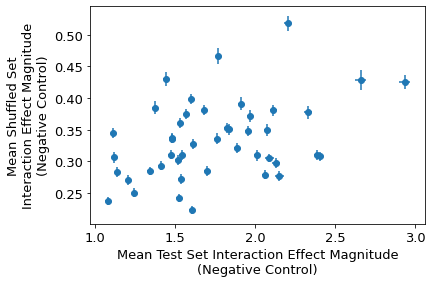

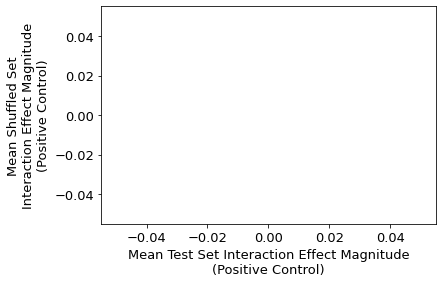

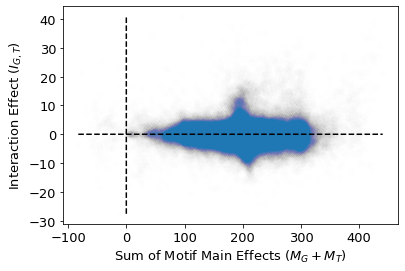

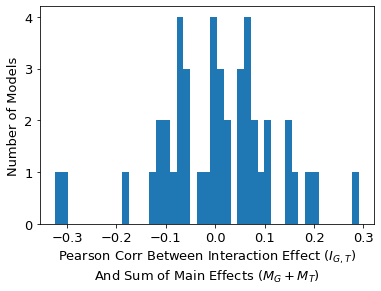

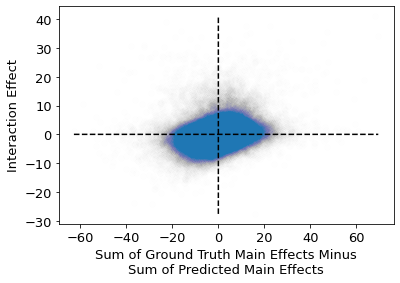

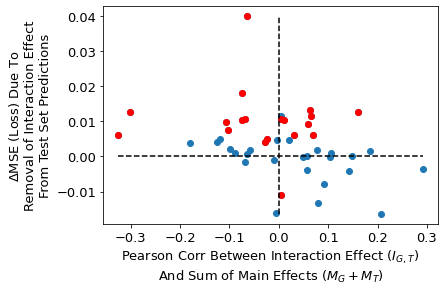

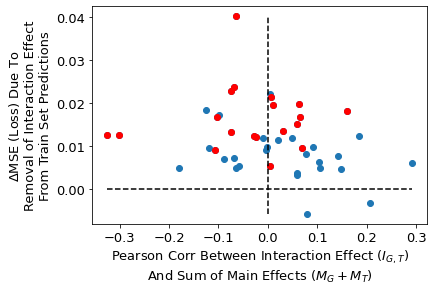

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rc('font', size=13)

#plt.plot(test_intereff_mag_mean, test_intereff_mag_mean, color="black")
plt.errorbar(x=negcontrol_test_intereff_mag_mean,
             y=negcontrol_shuff_intereff_mag_mean,
             xerr=negcontrol_test_intereff_mag_stderr,
             yerr=negcontrol_shuff_intereff_mag_stderr,
             fmt='o')
plt.xlabel("Mean Test Set Interaction Effect Magnitude\n(Negative Control)")
plt.ylabel("Mean Shuffled Set\nInteraction Effect Magnitude\n(Negative Control)")
plt.show()

plt.errorbar(x=poscontrol_test_intereff_mag_mean,
             y=poscontrol_shuff_intereff_mag_mean,
             xerr=poscontrol_test_intereff_mag_stderr,
             yerr=poscontrol_shuff_intereff_mag_stderr,
             fmt='o')
plt.xlabel("Mean Test Set Interaction Effect Magnitude\n(Positive Control)")
plt.ylabel("Mean Shuffled Set\nInteraction Effect Magnitude\n(Positive Control)")
plt.show()

xyaxis_scatterplot(negcontrol_main_eff_vec,
                   negcontrol_inter_eff_vec, density=False, alpha=0.003)
plt.xlabel(r"Sum of Motif Main Effects $(M_G + M_T)$")
plt.ylabel(r"Interaction Effect $(I_{G,T})$")
plt.show()

plt.hist(negcontrol_mainvintereff_corrs, bins=45)
plt.xlabel(r"Pearson Corr Between Interaction Effect $(I_{G,T})$"
            +"\n"+r"And Sum of Main Effects $(M_G + M_T)$")
plt.ylabel("Number of Models")
plt.show()

xyaxis_scatterplot(negcontrol_main_eff_error_vec,
                   negcontrol_inter_eff_vec, density=False, alpha=0.003)
plt.xlabel("Sum of Ground Truth Main Effects Minus"
           +"\nSum of Predicted Main Effects")
plt.ylabel("Interaction Effect")
plt.show()

xyaxis_scatterplot(negcontrol_mainvintereff_corrs,
                   negcontrol_test_lossimp_mean,
                   #yerr=negcontrol_test_lossimp_stderr,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol],
                   #fmt='o'
                   )
plt.xlabel(r"Pearson Corr Between Interaction Effect $(I_{G,T})$"
            +"\n"+r"And Sum of Main Effects $(M_G + M_T)$")
plt.ylabel(r"$\Delta$MSE (Loss) Due To "+"\n"+
           "Removal of Interaction Effect\nFrom Test Set Predictions")
plt.show()

xyaxis_scatterplot(negcontrol_mainvintereff_corrs,
                   negcontrol_train_lossimp_mean,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol])
plt.xlabel(r"Pearson Corr Between Interaction Effect $(I_{G,T})$"
            +"\n"+r"And Sum of Main Effects $(M_G + M_T)$")
plt.ylabel(r"$\Delta$MSE (Loss) Due To "+"\n"+
           "Removal of Interaction Effect\nFrom Train Set Predictions")
plt.show()

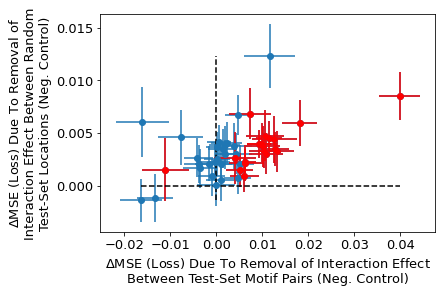

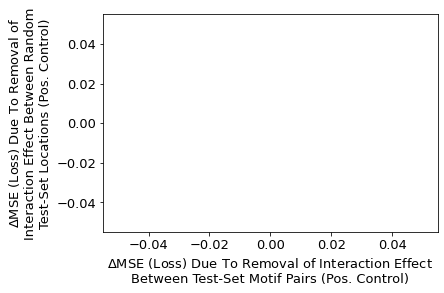

In [16]:
#MEDIAN_MULTIPLIER = 1.353

xyaxis_scatterplot(x=negcontrol_test_lossimp_mean,
                   y=negcontrol_controltest_lossimp_mean,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol],
                   xerr=negcontrol_test_lossimp_stderr,
                   yerr=negcontrol_controltest_lossimp_stderr,
                   fmt='o'
                   )
plt.xlabel(r"$\Delta$MSE (Loss) Due To Removal of Interaction Effect"+"\n"+"Between Test-Set Motif Pairs (Neg. Control)")
plt.ylabel(r"$\Delta$MSE (Loss) Due To Removal of"+"\n"+"Interaction Effect Between Random"+"\n"+"Test-Set Locations (Neg. Control)")
plt.show()

plt.errorbar(x=poscontrol_test_lossimp_mean,
                   y=poscontrol_controltest_lossimp_mean,
                   xerr=poscontrol_test_lossimp_stderr,
                   yerr=poscontrol_controltest_lossimp_stderr,
                   fmt='o'
                   )
plt.xlabel(r"$\Delta$MSE (Loss) Due To Removal of Interaction Effect"+"\n"+"Between Test-Set Motif Pairs (Pos. Control)")
plt.ylabel(r"$\Delta$MSE (Loss) Due To Removal of"+"\n"+"Interaction Effect Between Random"+"\n"+"Test-Set Locations (Pos. Control)")
plt.show()

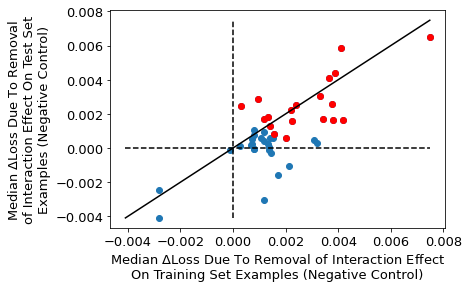

In [17]:
xyaxis_scatterplot(negcontrol_train_lossimp_median,
                   negcontrol_test_lossimp_median,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol],
                   withxeqy=True)
plt.ylabel("Median $\Delta$Loss Due To Removal"+"\n"
           +"of Interaction Effect On Test Set\nExamples (Negative Control)")
plt.xlabel("Median $\Delta$Loss Due To "
           +"Removal of Interaction Effect\nOn Training Set Examples (Negative Control)")
plt.show()

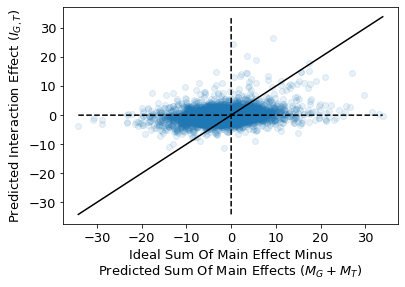

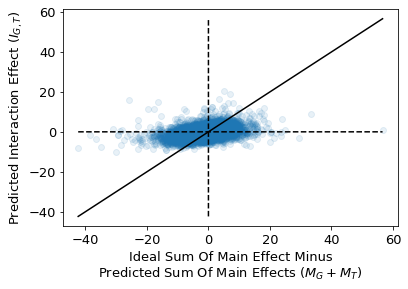

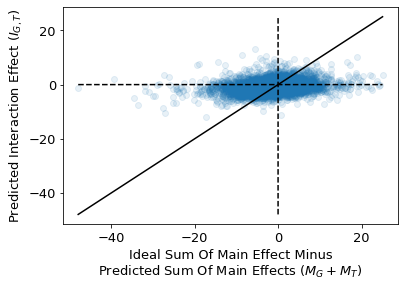

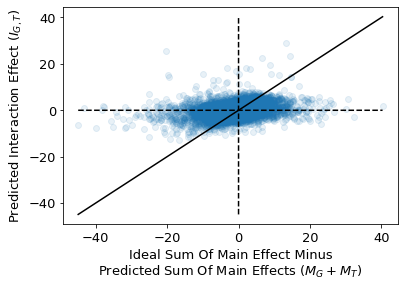

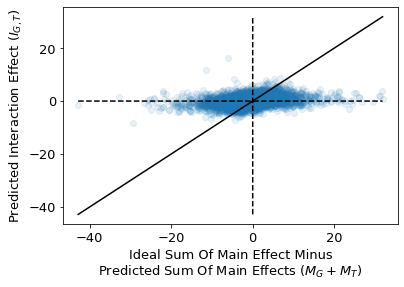

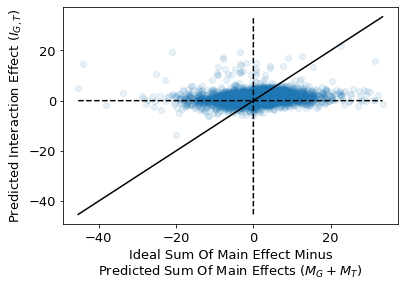

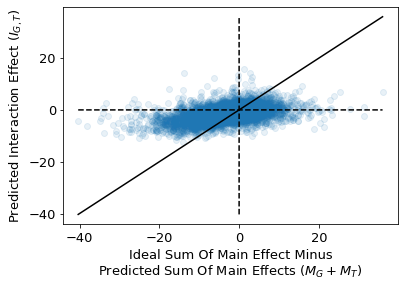

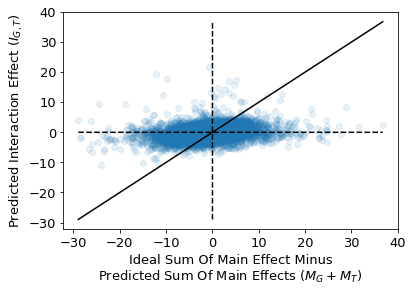

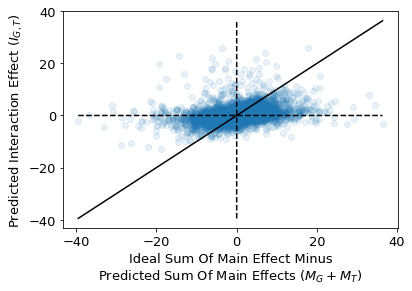

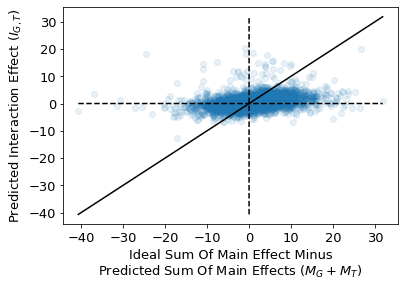

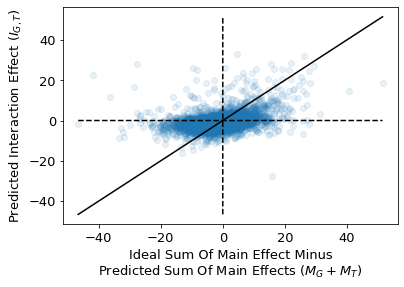

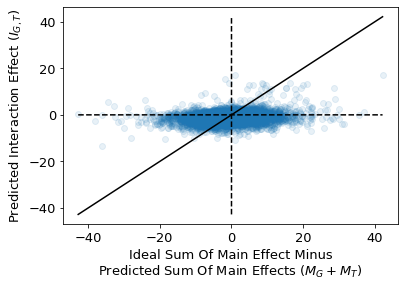

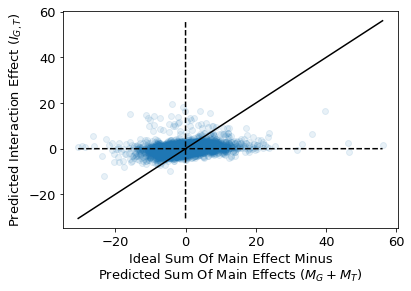

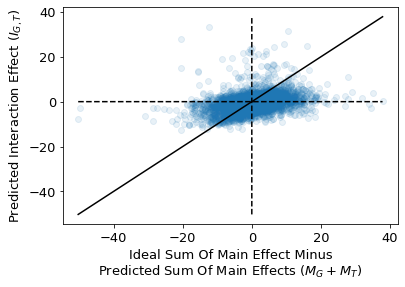

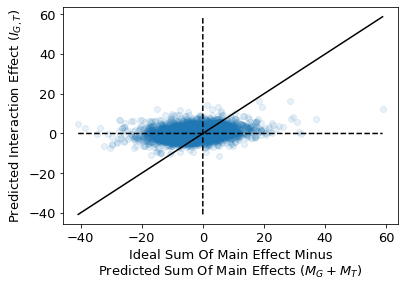

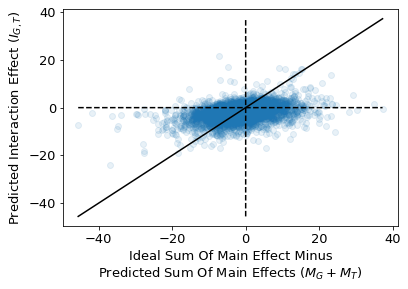

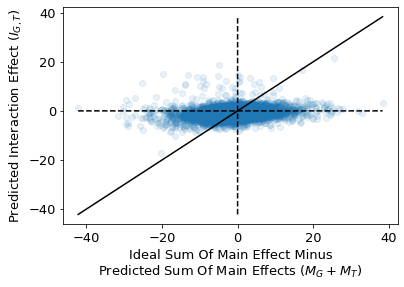

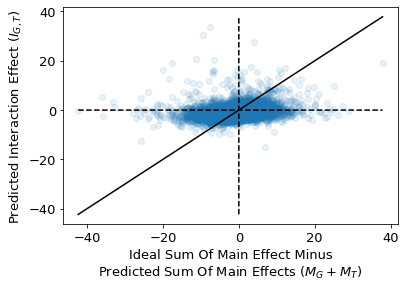

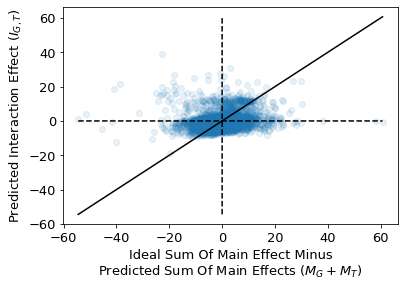

In [18]:
for modeltoplot in failed_paired_wilcoxon_negcontrol:
  single_model_result = negcontrol_results[modeltoplot]
  test_main_effs = (
    single_model_result.test_toanalyze_interactioneffectdata.A_main_eff
    + single_model_result.test_toanalyze_interactioneffectdata.B_main_eff)

  test_main_eff_error = test_toanalyze_groundtruth_neg_maineff - test_main_effs

  test_intereff = (
        single_model_result.test_toanalyze_interactioneffectdata.inter_eff)

  xyaxis_scatterplot(test_main_eff_error, test_intereff, withxeqy=True, alpha=0.1)
  plt.xlabel("Ideal Sum Of Main Effect Minus\nPredicted Sum Of Main Effects ($M_{G} + M_{T}$)")
  plt.ylabel("Predicted Interaction Effect ($I_{G,T}$)")
  plt.show()

In [22]:
negcontrol_results.keys()

odict_keys(['negcontrol_model-anscombemse_arch1_l1reg-0.0_seed100_gbywe.h5', 'negcontrol_model-anscombemse_arch2_l1reg-0.0_seed100_knxqc.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0_seed100_ydtvz.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed100_bemnn.h5', 'negcontrol_model-anscombemse_arch2_l1reg-0.0001_seed100_hharj.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0001_seed100_dgbrg.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.001_seed100_tiefn.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.001_seed100_nomup.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.0_seed200_brovm.h5', 'negcontrol_model-anscombemse_arch2_l1reg-0.0_seed200_ljpxf.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0_seed200_jzmpd.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed200_dmeaz.h5', 'negcontrol_model-anscombemse_arch2_l1reg-0.0001_seed200_qqfqv.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0001_seed200_tuyuq.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.001_seed200_

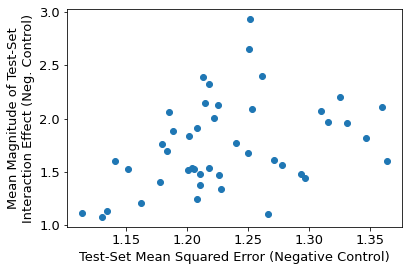

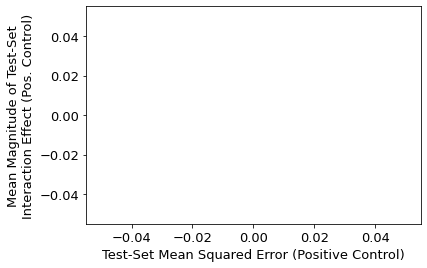

In [24]:
plt.scatter([np.mean(negcontrol_results[modelname].overall_test_loss)
             for modelname in negcontrol_results.keys()],
            [np.mean(np.abs(negcontrol_results[modelname]
                            .test_toanalyze_interactioneffectdata.inter_eff))
             for modelname in negcontrol_results])
plt.xlabel("Test-Set Mean Squared Error (Negative Control)")
plt.ylabel("Mean Magnitude of Test-Set\nInteraction Effect (Neg. Control)")
plt.show()

plt.scatter([np.mean(poscontrol_results[modelname].overall_test_loss)
             for modelname in poscontrol_results.keys()],
            [np.mean(np.abs(poscontrol_results[modelname]
                            .test_toanalyze_interactioneffectdata.inter_eff))
             for modelname in poscontrol_results.keys()])
plt.xlabel("Test-Set Mean Squared Error (Positive Control)")
plt.ylabel("Mean Magnitude of Test-Set\nInteraction Effect (Pos. Control)")
plt.show()

In [26]:
import pandas
from collections import OrderedDict

def extract_from_results(arr, extraction_func):
  return [extraction_func(x) for x in arr.values()]

def prepare_results_summary(results):
  fields = [("modelfiles", list(results.keys()))]
  fields += [
  #("test lossimp", extract_from_results(arr=results,
  #extraction_func=lambda x: np.mean(x.test_loss) )),
  ("test lossimp - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_lossimprovement_wilcoxon.pvalue)),
  ("test lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_lossimprovement_mannwhit.pvalue)),
  ("test v controltest lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_controltest_lossimp_mannwhit.pvalue)),
  ("test v controltest intereff mag - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_controltest_intereff_mag_mannwhit.pvalue)),
  ("train lossimp - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_toanalyze_lossimprovement_wilcoxon.pvalue)),
  ("train lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_toanalyze_lossimprovement_mannwhit.pvalue)),
  ("train v controltrain lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_v_controltrain_lossimp_mannwhit.pvalue)),
  ("train v controltrain intereff mag - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_v_controltrain_intereff_mag_mannwhit.pvalue)),
  ("test intereff - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_intereff_wilcoxon.pvalue)),
  ("test v shuff intereff mag mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_shuff_intereff_mag_mannwhit.pvalue)),
  ("test v shuff lossimp mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_shuff_lossimp_mannwhit.pvalue)),
  ]
  return pandas.DataFrame(OrderedDict(fields))

negcontrol_results_summary = prepare_results_summary(negcontrol_results)
poscontrol_results_summary = prepare_results_summary(poscontrol_results)

In [27]:
negcontrol_results_summary

,modelfiles,test lossimp - wilcox,test lossimp - mannwhit,test v controltest lossimp - mannwhit,test v controltest intereff mag - mannwhit,train lossimp - wilcox,train lossimp - mannwhit,train v controltrain lossimp - mannwhit,train v controltrain intereff mag - mannwhit,test intereff - wilcox,test v shuff intereff mag mannwhit,test v shuff lossimp mannwhit
0,negcontrol_model-anscombemse_arch1_l1reg-0.0_s...,6.873997e-01,0.578259,7.925128e-01,0.0,1.021299e-04,0.240799,3.645172e-03,0.0,6.883943e-02,0.0,0.999614
1,negcontrol_model-anscombemse_arch2_l1reg-0.0_s...,1.501144e-01,0.392516,5.089725e-01,0.0,7.618603e-03,0.299395,2.590570e-01,0.0,0.000000e+00,0.0,0.913684
2,negcontrol_model-anscombemse_arch3_l1reg-0.0_s...,3.330132e-03,0.404323,5.283165e-03,0.0,6.475190e-05,0.347490,2.703344e-02,0.0,2.876709e-98,0.0,0.255824
3,negcontrol_model-anscombemse_arch1_l1reg-0.000...,6.161395e-01,0.387235,9.154897e-01,0.0,7.463226e-03,0.319485,1.399228e-01,0.0,0.000000e+00,0.0,0.978051
4,negcontrol_model-anscombemse_arch2_l1reg-0.000...,9.826081e-01,0.663024,9.678147e-01,0.0,3.953687e-01,0.451710,4.805740e-01,0.0,0.000000e+00,0.0,0.999524
5,negcontrol_model-anscombemse_arch3_l1reg-0.000...,2.283124e-01,0.455101,2.429945e-01,0.0,1.258348e-02,0.307897,1.346929e-01,0.0,0.000000e+00,0.0,0.908787
6,negcontrol_model-anscombemse_arch1_l1reg-0.001...,7.771527e-02,0.480586,3.035015e-01,0.0,7.868518e-07,0.253887,3.505094e-04,0.0,1.070529e-21,0.0,0.615557
7,negcontrol_model-anscombemse_arch3_l1reg-0.001...,1.169811e-01,0.533898,2.007146e-01,0.0,4.817358e-02,0.387237,4.437667e-01,0.0,3.478435e-173,0.0,0.469727
8,negcontrol_model-anscombemse_arch1_l1reg-0.0_s...,3.824040e-01,0.518184,6.031466e-01,0.0,6.330237e-04,0.353587,4.862065e-02,0.0,5.370231e-61,0.0,0.952315
9,negcontrol_model-anscombemse_arch2_l1reg-0.0_s...,1.670651e-02,0.425425,2.584435e-01,0.0,3.920348e-03,0.364566,5.452984e-02,0.0,2.313705e-10,0.0,0.717981


In [28]:
poscontrol_results_summary

,modelfiles,test lossimp - wilcox,test lossimp - mannwhit,test v controltest lossimp - mannwhit,test v controltest intereff mag - mannwhit,train lossimp - wilcox,train lossimp - mannwhit,train v controltrain lossimp - mannwhit,train v controltrain intereff mag - mannwhit,test intereff - wilcox,test v shuff intereff mag mannwhit,test v shuff lossimp mannwhit


WilcoxonResult(statistic=16443682.0, pvalue=0.0033301321424699672)
0.002234319298959838


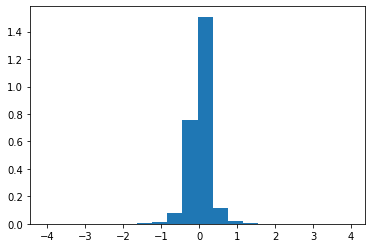

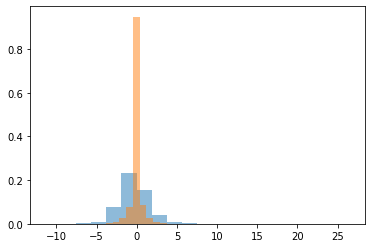

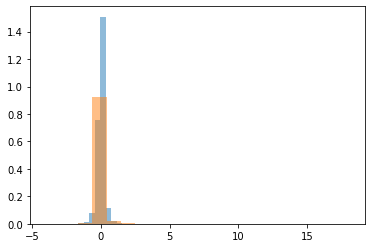

In [30]:
#sanity check single model

interaction_analysis = negcontrol_results["negcontrol_model-anscombemse_arch3_l1reg-0.0_seed100_ydtvz.h5"]
#interaction_analysis = poscontrol_results["poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5"]

%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats

print(scipy.stats.wilcoxon(
    x=interaction_analysis.test_toanalyze_lossimprovement,
    alternative="greater"))
print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
plt.hist(interaction_analysis.test_toanalyze_lossimprovement, density=True, bins=20)
plt.show()

plt.hist(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.show()

"""plt.hist(np.abs(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff)/
         (np.abs(interaction_analysis.test_toanalyze_interactioneffectdata.A_main_eff
          + interaction_analysis.test_toanalyze_interactioneffectdata.B_main_eff)),
         density=True, bins=20, alpha=0.5)
plt.hist(np.abs(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff)/
         (np.abs(interaction_analysis.shuff_toanalyze_interactioneffectdata.A_main_eff
          + interaction_analysis.shuff_toanalyze_interactioneffectdata.B_main_eff)),
         density=True, bins=20, alpha=0.5)
plt.show()""" #doesn't work cos sum on main off on dn shuff seqs can be tiny

#print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
#print(np.median(interaction_analysis.shuff_toanalyze_lossimprovement))

plt.hist(interaction_analysis.test_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.show()